# 1.Programmierung der AD-Wandlerkarte

Dies wurde schon durch die vorhandenen Funktionen in moodle erledigt

# 2.Genauigkeit der Analog-Digital-Wandlung

## 2.1.1
Die Genauigkeit eines Messdatenerfassungssystem hängt im wesentlichen von der Anzahl der Bits ab: (1/2^n)*100% = bei 11bit = 0,05%
Die Genauigkeit in Volt ergibt sich aus der minimalen Eingangsspannung und maximalen Eingangsspannung: (Umax-Umin)/2^n = 0,0049V

Messfehler Multimeter: 
 [[0.001]
 [0.002]
 [0.004]
 [0.011]
 [0.01 ]
 [0.01 ]
 [0.01 ]
 [0.01 ]
 [0.02 ]
 [0.019]]
Messfehler AD_Wandler: 
 [[0.002]
 [0.004]
 [0.002]
 [0.001]
 [0.01 ]
 [0.006]
 [0.002]
 [0.007]
 [0.007]
 [0.009]]
Standardabweichung Multimeter:  0.011414902540100934
Standardabweichung AD_Wandler:  0.005865151319446313


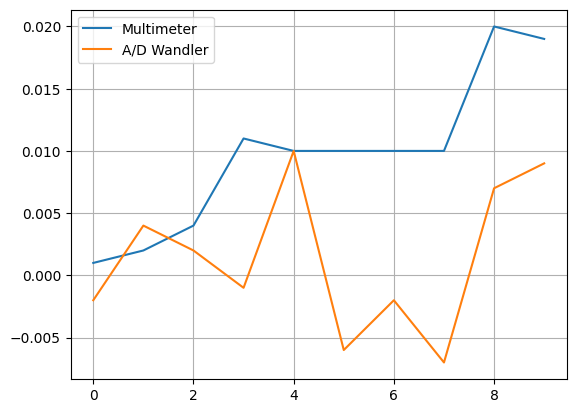

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import redlab as rl

data_feinmessgeraet_referenz = pd.read_csv('data.csv', sep=',', usecols=[4])
data_multimeter = pd.read_csv('data.csv', sep=',', usecols=[3])
data_AD_Wandler = pd.read_csv('data.csv', sep=',', usecols=[2])


data_feinmessgeraet_referenz = data_feinmessgeraet_referenz.to_numpy()
data_multimeter = data_multimeter.to_numpy()
data_AD_Wandler = data_AD_Wandler.to_numpy()


data_messfehler_multimeter = data_feinmessgeraet_referenz - data_multimeter
data_messfehler_ad_wandler = data_feinmessgeraet_referenz - data_AD_Wandler

print("Messfehler Multimeter: \n", data_messfehler_multimeter)
print("Messfehler AD_Wandler: \n", abs(data_messfehler_ad_wandler))


#Standardabweichung des Multimeters
standardabweichung_Multimeter = np.sqrt((1/len(data_messfehler_multimeter - 1)) * np.sum((data_messfehler_multimeter)**2))
standardabweichung_ad_wandler = np.sqrt((1/len(data_messfehler_ad_wandler - 1)) * np.sum(data_messfehler_ad_wandler**2))

print("Standardabweichung Multimeter: ", standardabweichung_Multimeter)
print("Standardabweichung AD_Wandler: ", standardabweichung_ad_wandler)

plt.plot(data_messfehler_multimeter, label='Multimeter')
plt.plot(data_messfehler_ad_wandler, label='A/D Wandler')
plt.grid()
plt.legend(loc='upper left')
plt.show()

# 3. Genauigkeit der DA-Wandlung
## 3.1 - Berechnen Sie den theoretischen Quantisierungsfehler des 10-Bit-DA-Wandlers (0V bis 5V)

## 3.2 - Messen Sie mit dem Oszilloskop nach und tragen Sie die Ergebnisse in eine Tabelle ein

## 3.3 - Bestimmen Sie wie in Aufgabe 2 die Standardabweichung und vergleichen Sie den
Fehler mit dem theoretisch berechneten Quantisierungsfehler.

In [54]:
# 3.1
print(f" Quantisierungsfehler: {5 / (2**10)}")

data_oscilloscope_referenz = pd.read_csv('messung_gruppeB6.csv', sep=',', usecols=[0])
data_oscilloscope = pd.read_csv('messung_gruppeB6.csv', sep=',', usecols=[1])
data_oscilloscope = data_oscilloscope.to_numpy()

#Berechne die Standardabweichung
standardabweichung_oscilloscope = np.sqrt((1 / (len(data_oscilloscope) - 1)) * np.sum((data_oscilloscope_referenz - data_oscilloscope)**2))
print("Standardabweichung Oszilloscope: ", standardabweichung_oscilloscope)

 Quantisierungsfehler: 0.0048828125
Standardabweichung Oszilloscope:  Spannung_(V)    0.063235
dtype: float64


/home/hermandi/miniconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


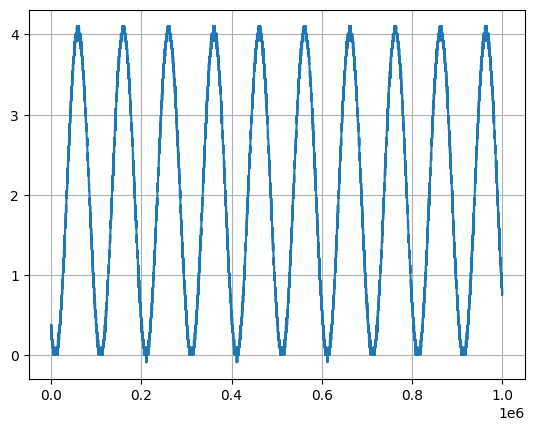

In [55]:
def replace_dot(x):
    return x.replace(',', '.').encode()

def read_file(x):
    return np.genfromtxt(
        (replace_dot(x) for x in open(f"./{x}")),
        delimiter=';', skip_header=1, usecols=(1))

sinus = read_file("Sinus.csv")
plt.plot(sinus, label='Sinus')
plt.grid()
plt.show()
